In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections.abc import Callable

In [2]:
def RungeKutta4(f: Callable[[np.float64, np.float64], np.float64],
               t_span: np.ndarray,
               y_init: np.float64,
               n: int) -> pd.DataFrame:
    c = np.array(object=[0, 1/2, 1/2, 1],
                 dtype=np.float64)
    a = np.array(object=[[0, 0, 0, 0],
                         [1/2, 0, 0, 0],
                         [0, 1/2, 0, 0],
                         [0, 0, 1, 0]], 
                dtype=np.float64)
    b = np.array(object=[1/6, 1/3, 1/3, 1/6], 
                dtype=np.float64)
    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start=t_span[0],
                    stop=t_span[1],
                    num=n+1,
                    dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan,
                     dtype=np.float64)
    y[0] = y_init
    for i in range(0, n, 1):
        k0 = f(t[i], y[i])
        k1 = f(t[i] + c[1]*h, y[i] + (a[1,0]*k0)*h)
        k2 = f(t[i] + c[2]*h, y[i] + (a[2,0]*k0) + (a[2,1]*k1)*h)
        k3 = f(t[i] + c[3]*h, y[i] + (a[3,0]*k0) + (a[3,1]*k1) + (a[3,2]*k2)*h)
        y[i+1] = y[i] + h*(b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3)
    df = pd.DataFrame(data={'t':t, 'y':y}, dtype=np.float64)
    return df

              t            y        exact        error
0  1.0000000000 0.0000000000 0.0000000000 0.0000000000
1  1.1000000000 0.0411035226 0.0411044424 0.0000009198
2  1.2000000000 0.0628932957 0.0628945147 0.0000012190
3  1.3000000000 0.0722396827 0.0722409471 0.0000012644
4  1.4000000000 0.0734573356 0.0734585435 0.0000012079
5  1.5000000000 0.0693428861 0.0693440008 0.0000011147
6  1.6000000000 0.0617578223 0.0617588352 0.0000010130
7  1.7000000000 0.0519692671 0.0519701819 0.0000009148
8  1.8000000000 0.0408561648 0.0408569895 0.0000008247
9  1.9000000000 0.0290377885 0.0290385327 0.0000007441
10 2.0000000000 0.0169559377 0.0169566105 0.0000006728


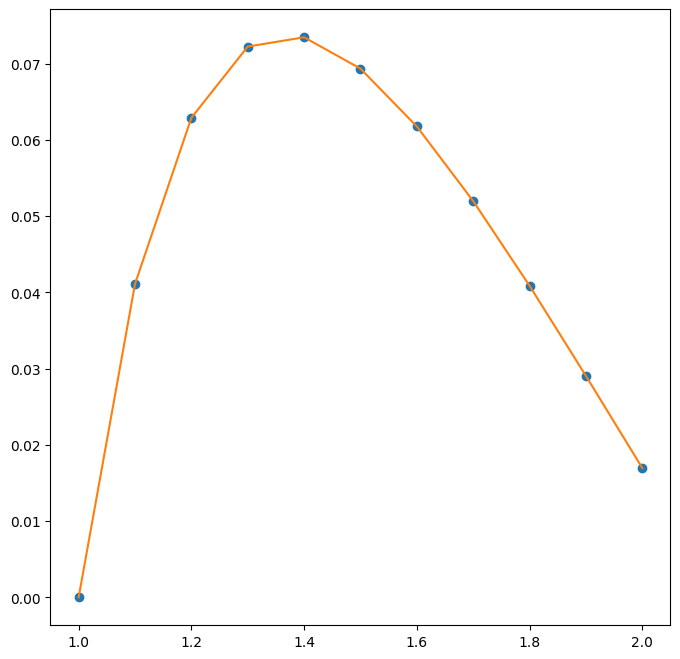

In [3]:
if __name__ == '__main__':
    def f(t: np.float64, y: np.float64) -> np.float64:
        return t**(-2)*(np.cos(t)-2*t*y)
    t_span = np.array(object=[1, 2], dtype=np.float64)
    y_init = 0.0
    n = 10
    df = RungeKutta4(f=f, t_span=t_span, y_init=y_init, n=n)

    def y(t: np.float64) -> np.float64:
        return t**(-2)*(np.sin(t)-np.sin(1))
    df.loc[:, 'exact'] = df.loc[:, 't'].apply(func=y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'], df.loc[:,'y'], 'o')
    ax.plot(df.loc[:,'t'], df.loc[:,'exact'], '-')
    plt.show()